California Housing Data

This data set contains information about all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area.

The task is to aproximate the median house value of each block from the values of the rest of the variables.

It has been obtained from the LIACC repository. The original page where the data set can be found is: http://www.liaad.up.pt/~ltorgo/Regression/DataSets.html.

# Importing the reuired modules:

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler  # (used to standarize out data)
from sklearn.model_selection import train_test_split # ( used to seperate our data set to train and test set)

* Import the cal_housing_clean.csv file.  Separate it into a training (70%) and testing set(30%).**

In [26]:
data=pd.read_csv("cal_housing_clean.csv")

In [27]:
data.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [76]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
housingMedianAge,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
totalRooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
totalBedrooms,20640.0,537.898014,421.247906,1.0000,295.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
medianIncome,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
medianHouseValue,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [32]:
x_data=data.drop("medianHouseValue",axis=1)
y_label=data.medianHouseValue

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_label,test_size=0.3, random_state=101)

In [35]:
X_train.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
6761,19.0,2742.0,756.0,1396.0,703.0,2.5663
3010,32.0,444.0,102.0,242.0,87.0,1.1528
7812,35.0,994.0,203.0,602.0,185.0,3.5865
8480,35.0,1281.0,219.0,710.0,184.0,4.8304
1051,16.0,1257.0,231.0,559.0,213.0,4.4531


In [37]:
y_train

6761     197500.0
3010     150000.0
7812     178000.0
8480     152800.0
1051     144300.0
16312     98900.0
2042     121600.0
1755     210800.0
16022    394100.0
20441    254500.0
13243    406700.0
6450     500001.0
10229    155000.0
6463     256700.0
183      123500.0
303       97500.0
1042     103000.0
14741    147700.0
18381    500001.0
2443      55300.0
7641     212400.0
517      500001.0
15465    183900.0
14309     81300.0
1477     112500.0
17197    290900.0
2895      57900.0
15638    380000.0
18035    281200.0
18295    500001.0
           ...   
3748     181500.0
7742     238300.0
6383     376800.0
11721    146900.0
8535     220300.0
20191    223600.0
15436    198800.0
12170     71300.0
5758     256300.0
18707     78200.0
17657    365400.0
9772      92400.0
18491    198600.0
19315    269800.0
1949     146100.0
12911    240000.0
49       112500.0
19566     93400.0
13020    214700.0
6460     272600.0
2623     119700.0
17357    193000.0
20463    264400.0
12363    142500.0
16983    2

Now we wanna transforl only X_train Data using min maxscalar

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scalar=MinMaxScaler()

In [41]:
X_train=pd.DataFrame(scalar.fit_transform(X_train),columns=X_train.columns,index=X_train.index)

In [42]:
X_train.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
6761,0.352941,0.069688,0.117163,0.048769,0.115442,0.142508
3010,0.607843,0.011242,0.015673,0.008367,0.014142,0.045027
7812,0.666667,0.025230,0.031347,0.020971,0.030258,0.212866
8480,0.666667,0.032530,0.033830,0.024752,0.030094,0.298651
1051,0.294118,0.031919,0.035692,0.019466,0.034863,0.272631


In [43]:
X_test=pd.DataFrame(scalar.fit_transform(X_test),columns=X_test.columns,index=X_test.index)

In [45]:
X_test.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
16086,0.686275,0.064243,0.058586,0.020575,0.062094,0.353133
8816,0.705882,0.038015,0.026869,0.010035,0.029369,0.770182
7175,0.901961,0.044846,0.052929,0.033217,0.054122,0.133626
16714,0.313725,0.059996,0.059798,0.026154,0.061045,0.263576
14491,0.411765,0.122929,0.090101,0.034871,0.091882,0.660046


# Lets create a feature column. 

In [ ]:
tf.feature_column.numeric_column()

In [48]:
feat_col=[]
for feat in X_train.columns:
    feat_col.append(tf.feature_column.numeric_column(feat))

In [49]:
feat_col

[NumericColumn(key='housingMedianAge', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='totalRooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='totalBedrooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='population', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='households', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='medianIncome', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [50]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [130]:
model=tf.estimator.DNNRegressor(hidden_units=[6,6,6],feature_columns=feat_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/v1/l6r3kv8s1dxc11vbv286xr1h0000gn/T/tmp1iq7f8se', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a34d9a0b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [131]:
model.train(input_fn=input_func,steps=50000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/v1/l6r3kv8s1dxc11vbv286xr1h0000gn/T/tmp1iq7f8se/model.ckpt.
INFO:tensorflow:loss = 426324430000.0, step = 1
INFO:tensorflow:global_step/sec: 398.664
INFO:tensorflow:loss = 479150540000.0, step = 101 (0.257 sec)
INFO:tensorflow:global_step/sec: 392.617
INFO:tensorflow:loss = 560037000000.0, step = 201 (0.252 sec)
INFO:tensorflow:global_step/sec: 450.317
INFO:tensorflow:loss = 420815700000.0, step = 301 (0.225 sec)
INFO:tensorflow:global_step/sec: 358.209
INFO:tensorflow:loss = 579632700000.0, step = 401 (0.274 sec)
INFO:tensorflow:global_step/sec: 480.164
INFO:tensorflow:loss = 732968100000.0, step = 501 (0.215 sec)
INFO:tensorflow:global_step/sec: 252.617
INFO:tensorflow:loss = 553713200000.0, s

INFO:tensorflow:loss = 52046123000.0, step = 7601 (0.195 sec)
INFO:tensorflow:global_step/sec: 508.307
INFO:tensorflow:loss = 197450430000.0, step = 7701 (0.197 sec)
INFO:tensorflow:global_step/sec: 500.461
INFO:tensorflow:loss = 98825110000.0, step = 7801 (0.205 sec)
INFO:tensorflow:global_step/sec: 493.228
INFO:tensorflow:loss = 99883310000.0, step = 7901 (0.200 sec)
INFO:tensorflow:global_step/sec: 481.935
INFO:tensorflow:loss = 153596430000.0, step = 8001 (0.205 sec)
INFO:tensorflow:global_step/sec: 518.103
INFO:tensorflow:loss = 122719220000.0, step = 8101 (0.194 sec)
INFO:tensorflow:global_step/sec: 526.255
INFO:tensorflow:loss = 42243764000.0, step = 8201 (0.189 sec)
INFO:tensorflow:global_step/sec: 490.506
INFO:tensorflow:loss = 67906224000.0, step = 8301 (0.204 sec)
INFO:tensorflow:global_step/sec: 509.375
INFO:tensorflow:loss = 212919910000.0, step = 8401 (0.196 sec)
INFO:tensorflow:global_step/sec: 490.204
INFO:tensorflow:loss = 66232263000.0, step = 8501 (0.204 sec)
INFO:te

INFO:tensorflow:loss = 149458440000.0, step = 15501 (0.191 sec)
INFO:tensorflow:global_step/sec: 517.165
INFO:tensorflow:loss = 184864870000.0, step = 15601 (0.194 sec)
INFO:tensorflow:global_step/sec: 509.476
INFO:tensorflow:loss = 71026950000.0, step = 15701 (0.194 sec)
INFO:tensorflow:global_step/sec: 518.428
INFO:tensorflow:loss = 245675750000.0, step = 15801 (0.195 sec)
INFO:tensorflow:global_step/sec: 481.216
INFO:tensorflow:loss = 208152990000.0, step = 15901 (0.207 sec)
INFO:tensorflow:global_step/sec: 492.49
INFO:tensorflow:loss = 99768650000.0, step = 16001 (0.206 sec)
INFO:tensorflow:global_step/sec: 489.864
INFO:tensorflow:loss = 148751300000.0, step = 16101 (0.202 sec)
INFO:tensorflow:global_step/sec: 518.95
INFO:tensorflow:loss = 104114135000.0, step = 16201 (0.195 sec)
INFO:tensorflow:global_step/sec: 508.44
INFO:tensorflow:loss = 37449120000.0, step = 16301 (0.193 sec)
INFO:tensorflow:global_step/sec: 520.63
INFO:tensorflow:loss = 100026820000.0, step = 16401 (0.192 sec

INFO:tensorflow:global_step/sec: 548.134
INFO:tensorflow:loss = 90285430000.0, step = 23401 (0.184 sec)
INFO:tensorflow:global_step/sec: 485.992
INFO:tensorflow:loss = 141430260000.0, step = 23501 (0.206 sec)
INFO:tensorflow:global_step/sec: 472.865
INFO:tensorflow:loss = 137639440000.0, step = 23601 (0.210 sec)
INFO:tensorflow:global_step/sec: 515.15
INFO:tensorflow:loss = 38545360000.0, step = 23701 (0.193 sec)
INFO:tensorflow:global_step/sec: 532.295
INFO:tensorflow:loss = 182298970000.0, step = 23801 (0.191 sec)
INFO:tensorflow:global_step/sec: 492.9
INFO:tensorflow:loss = 120906920000.0, step = 23901 (0.201 sec)
INFO:tensorflow:global_step/sec: 570.748
INFO:tensorflow:loss = 123257900000.0, step = 24001 (0.177 sec)
INFO:tensorflow:global_step/sec: 526.67
INFO:tensorflow:loss = 138974530000.0, step = 24101 (0.188 sec)
INFO:tensorflow:global_step/sec: 523.849
INFO:tensorflow:loss = 68020707000.0, step = 24201 (0.191 sec)
INFO:tensorflow:global_step/sec: 565.461
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 505.459
INFO:tensorflow:loss = 160043250000.0, step = 31301 (0.198 sec)
INFO:tensorflow:global_step/sec: 487.981
INFO:tensorflow:loss = 107939020000.0, step = 31401 (0.204 sec)
INFO:tensorflow:global_step/sec: 513.411
INFO:tensorflow:loss = 43610124000.0, step = 31501 (0.195 sec)
INFO:tensorflow:global_step/sec: 483.133
INFO:tensorflow:loss = 56907997000.0, step = 31601 (0.208 sec)
INFO:tensorflow:global_step/sec: 452.08
INFO:tensorflow:loss = 64542065000.0, step = 31701 (0.222 sec)
INFO:tensorflow:global_step/sec: 471.852
INFO:tensorflow:loss = 96822534000.0, step = 31801 (0.211 sec)
INFO:tensorflow:global_step/sec: 483.725
INFO:tensorflow:loss = 99192260000.0, step = 31901 (0.207 sec)
INFO:tensorflow:global_step/sec: 480.612
INFO:tensorflow:loss = 176073870000.0, step = 32001 (0.207 sec)
INFO:tensorflow:global_step/sec: 486.601
INFO:tensorflow:loss = 152600200000.0, step = 32101 (0.203 sec)
INFO:tensorflow:global_step/sec: 531.666
INFO:tensorflow:loss

INFO:tensorflow:global_step/sec: 470.675
INFO:tensorflow:loss = 62751170000.0, step = 39201 (0.211 sec)
INFO:tensorflow:global_step/sec: 476.388
INFO:tensorflow:loss = 121683770000.0, step = 39301 (0.207 sec)
INFO:tensorflow:global_step/sec: 520.441
INFO:tensorflow:loss = 56341996000.0, step = 39401 (0.193 sec)
INFO:tensorflow:global_step/sec: 518.113
INFO:tensorflow:loss = 138803280000.0, step = 39501 (0.194 sec)
INFO:tensorflow:global_step/sec: 540.874
INFO:tensorflow:loss = 125716190000.0, step = 39601 (0.186 sec)
INFO:tensorflow:global_step/sec: 510.808
INFO:tensorflow:loss = 33798672000.0, step = 39701 (0.195 sec)
INFO:tensorflow:global_step/sec: 533.325
INFO:tensorflow:loss = 70486580000.0, step = 39801 (0.189 sec)
INFO:tensorflow:global_step/sec: 511.949
INFO:tensorflow:loss = 113049620000.0, step = 39901 (0.194 sec)
INFO:tensorflow:global_step/sec: 562.174
INFO:tensorflow:loss = 53696664000.0, step = 40001 (0.178 sec)
INFO:tensorflow:global_step/sec: 519.702
INFO:tensorflow:los

INFO:tensorflow:global_step/sec: 509.769
INFO:tensorflow:loss = 101763460000.0, step = 47101 (0.194 sec)
INFO:tensorflow:global_step/sec: 497.221
INFO:tensorflow:loss = 49509364000.0, step = 47201 (0.200 sec)
INFO:tensorflow:global_step/sec: 550.122
INFO:tensorflow:loss = 106981090000.0, step = 47301 (0.182 sec)
INFO:tensorflow:global_step/sec: 514.041
INFO:tensorflow:loss = 68399112000.0, step = 47401 (0.197 sec)
INFO:tensorflow:global_step/sec: 522.127
INFO:tensorflow:loss = 33767120000.0, step = 47501 (0.189 sec)
INFO:tensorflow:global_step/sec: 507.097
INFO:tensorflow:loss = 133185225000.0, step = 47601 (0.197 sec)
INFO:tensorflow:global_step/sec: 474.068
INFO:tensorflow:loss = 110902910000.0, step = 47701 (0.216 sec)
INFO:tensorflow:global_step/sec: 521.943
INFO:tensorflow:loss = 70654710000.0, step = 47801 (0.186 sec)
INFO:tensorflow:global_step/sec: 495.776
INFO:tensorflow:loss = 78473000000.0, step = 47901 (0.203 sec)
INFO:tensorflow:global_step/sec: 531.833
INFO:tensorflow:los

In [132]:
predict_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [133]:
pred_gen=model.predict(predict_input_func)

In [134]:
predictions=list(pred_gen)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/v1/l6r3kv8s1dxc11vbv286xr1h0000gn/T/tmp1iq7f8se/model.ckpt-50000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [135]:
predictions

[{'predictions': array([246550.02], dtype=float32)},
 {'predictions': array([332765.28], dtype=float32)},
 {'predictions': array([214413.58], dtype=float32)},
 {'predictions': array([194181.83], dtype=float32)},
 {'predictions': array([301313.84], dtype=float32)},
 {'predictions': array([207662.56], dtype=float32)},
 {'predictions': array([229836.95], dtype=float32)},
 {'predictions': array([211335.73], dtype=float32)},
 {'predictions': array([229522.83], dtype=float32)},
 {'predictions': array([208672.77], dtype=float32)},
 {'predictions': array([211995.39], dtype=float32)},
 {'predictions': array([234396.97], dtype=float32)},
 {'predictions': array([197378.19], dtype=float32)},
 {'predictions': array([182982.52], dtype=float32)},
 {'predictions': array([268530.06], dtype=float32)},
 {'predictions': array([185045.33], dtype=float32)},
 {'predictions': array([201187.05], dtype=float32)},
 {'predictions': array([197782.89], dtype=float32)},
 {'predictions': array([193007.4], dtype=float

In [136]:
pred_list=[]

for pred in predictions:
    pred_list.append(pred["predictions"][0])

In [137]:
pred_list

[246550.02,
 332765.28,
 214413.58,
 194181.83,
 301313.84,
 207662.56,
 229836.95,
 211335.73,
 229522.83,
 208672.77,
 211995.39,
 234396.97,
 197378.19,
 182982.52,
 268530.06,
 185045.33,
 201187.05,
 197782.89,
 193007.4,
 254763.34,
 182239.7,
 253636.86,
 226106.38,
 176087.69,
 193345.86,
 286834.66,
 190430.78,
 145313.1,
 174686.19,
 226743.48,
 255567.53,
 211119.53,
 251305.66,
 236615.64,
 209822.61,
 190932.98,
 185823.69,
 197354.64,
 210374.47,
 216118.1,
 224758.69,
 208047.14,
 206635.23,
 204999.2,
 234605.7,
 233553.08,
 231731.33,
 176593.36,
 204614.64,
 219778.52,
 186786.4,
 215736.48,
 309362.06,
 201599.1,
 197606.61,
 184365.14,
 226491.31,
 215282.88,
 232474.34,
 201115.53,
 235441.53,
 313667.94,
 282392.03,
 238773.47,
 177215.1,
 219885.73,
 199485.23,
 270007.66,
 248618.22,
 217503.27,
 209032.58,
 197379.5,
 200722.03,
 200503.8,
 207614.22,
 223981.02,
 267525.97,
 195058.73,
 303718.84,
 207932.38,
 234821.77,
 248250.28,
 212554.02,
 182379.03,
 24

In [139]:
from sklearn.metrics import mean_squared_error
from sklearn import  metrics

In [142]:
mse=mean_squared_error(y_test,pred_list)**0.5

In [143]:
mse

97132.91096170849

(array([   3.,   46., 1173., 2018., 1398.,  715.,  404.,  272.,  140.,
          23.]),
 array([-284859.28125 , -220332.659375, -155806.0375  ,  -91279.415625,
         -26752.79375 ,   37773.828125,  102300.45    ,  166827.071875,
         231353.69375 ,  295880.315625,  360406.9375  ]),
 <a list of 10 Patch objects>)

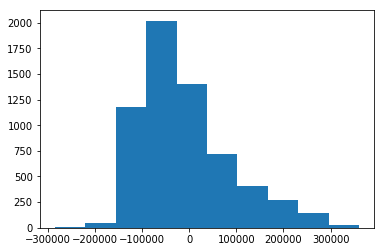

In [144]:
plt.hist((y_test-pred_list)) # 6666 50000

(array([   3.,   46., 1173., 2018., 1398.,  715.,  404.,  272.,  140.,
          23.]),
 array([-284859.28125 , -220332.659375, -155806.0375  ,  -91279.415625,
         -26752.79375 ,   37773.828125,  102300.45    ,  166827.071875,
         231353.69375 ,  295880.315625,  360406.9375  ]),
 <a list of 10 Patch objects>)

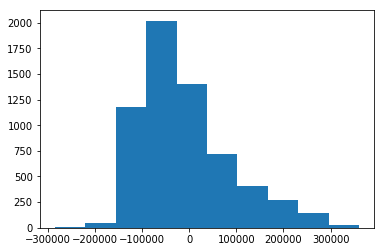

In [145]:
plt.hist((y_test-pred_list)) # 6666 50000

# Lets try this by Linearregressor

In [102]:
model1=tf.estimator.LinearRegressor(feature_columns=feat_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/v1/l6r3kv8s1dxc11vbv286xr1h0000gn/T/tmprcx9fxtr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a219e4c88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [104]:
model1.train(input_fn=input_func,steps=20000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/v1/l6r3kv8s1dxc11vbv286xr1h0000gn/T/tmprcx9fxtr/model.ckpt.
INFO:tensorflow:loss = 441929040000.0, step = 1
INFO:tensorflow:global_step/sec: 363.921
INFO:tensorflow:loss = 784184200000.0, step = 101 (0.277 sec)
INFO:tensorflow:global_step/sec: 496.431
INFO:tensorflow:loss = 765481300000.0, step = 201 (0.203 sec)
INFO:tensorflow:global_step/sec: 469.009
INFO:tensorflow:loss = 752008760000.0, step = 301 (0.210 sec)
INFO:tensorflow:global_step/sec: 473.779
INFO:tensorflow:loss = 667436400000.0, step = 401 (0.213 sec)
INFO:tensorflow:global_step/sec: 513.345
INFO:tensorflow:loss = 552842800000.0, step = 501 (0.195 sec)
INFO:tensorflow:global_step/sec: 493.832
INFO:tensorflow:loss = 605472600000.0, s

INFO:tensorflow:global_step/sec: 391.005
INFO:tensorflow:loss = 336901300000.0, step = 7601 (0.258 sec)
INFO:tensorflow:global_step/sec: 481.287
INFO:tensorflow:loss = 735573600000.0, step = 7701 (0.205 sec)
INFO:tensorflow:global_step/sec: 509.001
INFO:tensorflow:loss = 564503700000.0, step = 7801 (0.197 sec)
INFO:tensorflow:global_step/sec: 512.29
INFO:tensorflow:loss = 467315000000.0, step = 7901 (0.195 sec)
INFO:tensorflow:global_step/sec: 501.028
INFO:tensorflow:loss = 484704600000.0, step = 8001 (0.201 sec)
INFO:tensorflow:global_step/sec: 473.278
INFO:tensorflow:loss = 736568340000.0, step = 8101 (0.211 sec)
INFO:tensorflow:global_step/sec: 449.519
INFO:tensorflow:loss = 853519960000.0, step = 8201 (0.221 sec)
INFO:tensorflow:global_step/sec: 474.172
INFO:tensorflow:loss = 620899340000.0, step = 8301 (0.215 sec)
INFO:tensorflow:global_step/sec: 479.368
INFO:tensorflow:loss = 606115460000.0, step = 8401 (0.206 sec)
INFO:tensorflow:global_step/sec: 475.042
INFO:tensorflow:loss = 6

INFO:tensorflow:loss = 699102700000.0, step = 15401 (0.186 sec)
INFO:tensorflow:global_step/sec: 519.214
INFO:tensorflow:loss = 707788870000.0, step = 15501 (0.196 sec)
INFO:tensorflow:global_step/sec: 517.293
INFO:tensorflow:loss = 723610300000.0, step = 15601 (0.191 sec)
INFO:tensorflow:global_step/sec: 504.846
INFO:tensorflow:loss = 1006223200000.0, step = 15701 (0.200 sec)
INFO:tensorflow:global_step/sec: 464.354
INFO:tensorflow:loss = 373220840000.0, step = 15801 (0.212 sec)
INFO:tensorflow:global_step/sec: 460.836
INFO:tensorflow:loss = 562752900000.0, step = 15901 (0.221 sec)
INFO:tensorflow:global_step/sec: 503.745
INFO:tensorflow:loss = 750341200000.0, step = 16001 (0.197 sec)
INFO:tensorflow:global_step/sec: 512.65
INFO:tensorflow:loss = 481748000000.0, step = 16101 (0.200 sec)
INFO:tensorflow:global_step/sec: 244.367
INFO:tensorflow:loss = 1089369800000.0, step = 16201 (0.402 sec)
INFO:tensorflow:global_step/sec: 483.758
INFO:tensorflow:loss = 697782760000.0, step = 16301 (0

In [105]:
predict_input_func1=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [107]:
pred_gen1=model1.predict(predict_input_func1)

In [109]:
predictions1=list(pred_gen1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/v1/l6r3kv8s1dxc11vbv286xr1h0000gn/T/tmprcx9fxtr/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [114]:
pred_list1=[]

for pred in predictions1:
    pred_list1.append(pred["predictions"][0])

In [115]:
mse1=mean_squared_error(y_test,pred_list1)**0.5

6192

In [117]:
mse1

237921.13110513255

In [118]:
import seaborn as sns

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


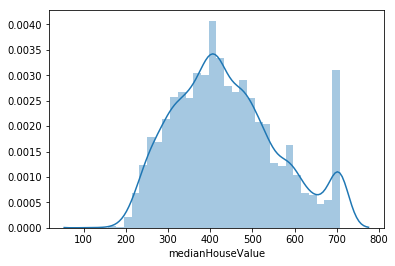

In [120]:
sns.distplot((y_test-pred_list1)**0.5)

In [146]:
score_with_Rnn= metrics.(y_test,pred_list)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets